In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv("/content/diabetes.csv")

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

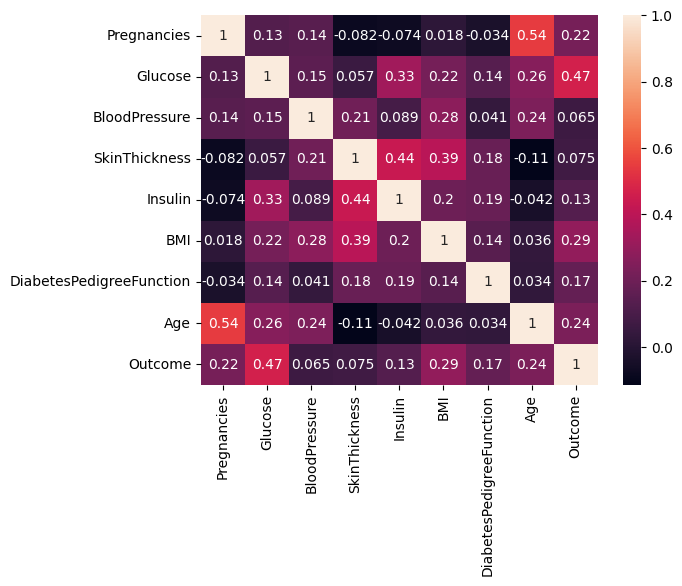

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
data.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [11]:
x= data.drop(columns="Outcome", axis=1)
y= data["Outcome"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

**applying random classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train, Y_train)
train_data_rf = rf.predict(X_train)
test_data_rf = rf.predict(X_test)
print (train_data_rf)
print(test_data_rf)

[0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}




In [49]:
rf_grid= GridSearchCV(estimator =rf, param_grid= param_grid_rf, cv=5, scoring="accuracy")


In [50]:
rf_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [51]:
train_predict_rf = rf_grid.predict(X_train)
test_predict_rf = rf_grid.predict(X_test)

In [52]:
train_accuracy_rf= accuracy_score(train_predict_rf, Y_train)
train_accuracy_rf

0.9039087947882736

In [53]:
test_accuracy_rf = accuracy_score(test_predict_rf, Y_test)
test_accuracy_rf

0.7402597402597403

**KNN CLASSIFIER**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best score achieved
print("Best score achieved: ", grid_search.best_score_)


Best parameters found:  {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best score achieved:  0.759016393442623


In [56]:
train_predict_knn = grid_search.predict(X_train)
test_predict_knn = grid_search.predict(X_test)

In [58]:
train_accuracy= accuracy_score(train_predict_knn, Y_train)
print(train_accuracy)
test_accuracy= accuracy_score(test_predict_knn, Y_test)
print(test_accuracy)


0.7915309446254072
0.6753246753246753


**SVM CLASSIFIER > DATA STANDARIZATION**

In [12]:
#data standarization
scaler = StandardScaler()
standard_Data = scaler.fit_transform(x)

In [13]:
x_standard = standard_Data
print (x_standard)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x_standard, y, test_size=0.2,stratify=y, random_state=42)

In [15]:
classifier= svm.SVC(kernel ="linear")

In [16]:
fit_data = classifier.fit(X_train, Y_train)

In [17]:
#ACCURACYSCORE
train_accuracy =classifier.predict(X_train)
train_data_accuracy = accuracy_score(train_accuracy,Y_train)


In [18]:
train_data_accuracy

0.7915309446254072

In [19]:
test_accuracy =classifier.predict(X_test)
test_data_accuracy = accuracy_score(test_accuracy,Y_test)

In [20]:
test_data_accuracy

0.7207792207792207

In [34]:
#making a predict system

input_data = (1,85,66,29,0,26.6,0.351,31)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standard= scaler.transform(input_data_reshaped)
prediction = classifier.predict(input_data_reshaped)
print (prediction)
if(prediction[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[1]
The person is diabetic


**RESAMPLING THE DATA**

In [21]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [22]:
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, Y_train)

In [23]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (428, 8)
Shape of y_train_resampled: (428,)


**DECISIONTREECLASSIFIER**

**HYPERPARAMETER TUNING-GRIDSEARCHCV**

In [94]:
from sklearn import tree
dt= tree.DecisionTreeClassifier()
scaler= StandardScaler()
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

from sklearn.model_selection import GridSearchCV

In [95]:
grid_search1 = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [96]:
grid_search1.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [97]:
print("Best parameters found: ", grid_search1.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search1.best_score_))

Best parameters found:  {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation accuracy: 0.72


In [98]:
best_model_dt = grid_search1.best_estimator_
best_model_dt

DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5)

In [99]:
train_pred_dt = best_model_dt.predict(X_train_resampled)
train_pred_dt
test_pred_dt = best_model_dt.predict(X_test)

In [31]:
train_accuracy = accuracy_score(y_train_resampled, train_pred_dt)
print(train_accuracy)
test_accuracy = accuracy_score(Y_test, test_pred_dt)

0.9579439252336449


In [32]:
test_accuracy = accuracy_score(Y_test, test_pred_dt)
test_accuracy

0.6883116883116883

In [33]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = best_model.predict(input_data_reshaped)
print (prediction1)
if(prediction1[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Boosting classification algorithms with Resampling data**

In [74]:
from xgboost import XGBClassifier
xbc = XGBClassifier(n_estimators=100, learning_rate = 0.1,max_depth = 3, colsample_bytree= 0.9, gamma = 0.2)
xbc.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
train_predict_xbc = xbc.predict(X_train_resampled)
test_predict_xbc = xbc.predict(X_test)

In [76]:
train_accuracy_xbc = accuracy_score(train_predict_xbc, y_train_resampled)
train_accuracy_xbc

0.9158878504672897

In [77]:
test_accuracy_xbc = accuracy_score(test_predict_xbc, Y_test)
test_accuracy_xbc

0.7467532467532467

In [78]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = model.predict(input_data_reshaped)
print (prediction1)
if(prediction1[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

1/1 [==============================] - 0s 186ms/step
[[0.67165554]]
The person is diabetic


**APPLYING Artificial neural networks**

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [35]:
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
model = Sequential()

In [37]:
model = keras.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),

])

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
11/11 [==============================] - 1s 26ms/step - loss: 8.4934 - accuracy: 0.6140 - val_loss: 6.6946 - val_accuracy: 0.3837
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 3.1312 - accuracy: 0.3830 - val_loss: 0.7389 - val_accuracy: 0.7558
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 1.7855 - accuracy: 0.5439 - val_loss: 4.1853 - val_accuracy: 0.0930
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 1.3970 - accuracy: 0.5556 - val_loss: 1.2144 - val_accuracy: 0.5465
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 1.0305 - accuracy: 0.5614 - val_loss: 1.3499 - val_accuracy: 0.5000
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.8704 - accuracy: 0.6140 - val_loss: 1.3126 - val_accuracy: 0.4419
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.8258 - accuracy: 0.6140 - val_loss: 0.7984 - val_accuracy: 0.6395
Epoch 8/10
11/11 [=

In [64]:
train_pred_ann = model.predict(X_train_resampled)

14/14 [==============================] - 0s 2ms/step


In [65]:
train_pred_ann

array([[1.63223699e-01],
       [5.92259020e-02],
       [2.82732666e-01],
       [1.88651979e-01],
       [6.49546385e-02],
       [4.08963621e-01],
       [4.35332835e-01],
       [2.64345761e-02],
       [9.52723265e-01],
       [3.36625844e-01],
       [5.65277338e-02],
       [2.05220096e-03],
       [5.72510421e-01],
       [4.33573067e-01],
       [1.25208274e-01],
       [8.53356481e-01],
       [1.92260101e-01],
       [3.15611869e-01],
       [2.49578506e-01],
       [3.66992950e-01],
       [3.17984521e-01],
       [5.81669450e-01],
       [1.03013985e-01],
       [3.16127688e-01],
       [6.26551509e-01],
       [2.94882476e-01],
       [6.86472774e-01],
       [1.18508087e-02],
       [1.08065166e-01],
       [5.26218772e-01],
       [2.94170320e-01],
       [7.32160509e-01],
       [6.80879951e-01],
       [5.77294171e-01],
       [2.88523585e-01],
       [9.22096908e-01],
       [5.61957955e-01],
       [1.65611759e-01],
       [3.27564001e-01],
       [4.61850911e-01],


In [71]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = model.predict(input_data_reshaped)
print (prediction1)
if(prediction1[0] == 0):
  print("The person is not diabetic")
else:
  print("The person is diabetic")

1/1 [==============================] - 0s 89ms/step
[[0.82916194]]
The person is diabetic


In [68]:
test_pred_ann = model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


**saving the trained model**

In [79]:
import pickle

In [100]:
filename = "trained_model_diabetes_dt.sav"
pickle.dump(best_model_dt, open(filename,'wb'))

In [101]:
#loading the saved_model
loaded_model = pickle.load(open('trained_model_diabetes_dt.sav', 'rb'))
loaded_model

DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=5)

In [105]:
input_data = (10, 139, 80, 0, 0, 27.1, 1.441, 57)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#scaler = StandardScaler()

#standard_data= scaler.fit_transform(input_data_reshaped)
prediction =loaded_model.predict(input_data_reshaped)
#prediction =loaded_model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
